In [6]:
from pyspark.sql.functions import expr
from pyspark.sql.types import IntegerType
import os
from pyspark.sql import SparkSession

from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType


spark = SparkSession.builder.appName("Stress Levels Analysis").getOrCreate()
sc = spark.sparkContext

In [5]:
df = spark.read.csv("../dataset/test_df.csv", header=True, inferSchema=True)

In [8]:
for i in range(3):
    pass
i

2

In [11]:
rr_levels = [700, 900, 1000]
rr_labels = ["High", "Normal-High", "Normal-Low", "Low"]
def get_rr_levels(rr):

    for idx, level in enumerate(rr_levels):
        if rr['MEAN_RR'] < level:
            return (idx, 1)

    return (idx + 1, 1)

# Apply the map function using User Defined Function (UDF)
get_rr_levels_udf = udf(get_rr_levels, IntegerType())

# df = df.withColumn("RR_CATEGORY", get_rr_levels_udf(df["MEAN_RR"]))

res = df.rdd.map(get_rr_levels).reduceByKey(lambda x, y: x + y).collect()


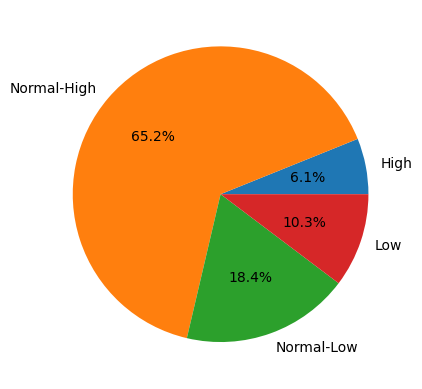

In [16]:
import matplotlib.pyplot as plt

plt.pie([count for cat, count in sorted(res)], labels=[rr_labels[cat] for cat, count in sorted(res)], autopct='%1.1f%%')
plt.show()